In [1]:
"""
MODIFIED ONE - CLONED FROM THE ORIGINAL CODE

class_label is still 9; Since we used the 10 class model

If you want to run, models separately search for 
"""

'\nMODIFIED ONE - CLONED FROM THE ORIGINAL CODE\n\nclass_label is still 9; Since we used the 10 class model\n\nIf you want to run, models separately search for \n'

## <span style="color:red">Wait!!! Don't run the script right away..</span>
If you want to run models separately search for #LOADPICKLESANDRUN (to save time)

In [1]:
#--------------------------------------------------------------------------------------------<Import libraries>--------------||
import numpy as np
import pandas as pd
import os
import warnings

#SUPPRESS WARNINGS
warnings.filterwarnings("ignore")

In [2]:
fileName = input("Enter the filename :")

Enter the filename : features_L003


In [ ]:
%%time

#--------------------------------------------------------------------------------------------<Load computed features>--------||
data = pd.read_csv(f"ProcessedData/{fileName}.csv")

fileName = fileName.replace("features_", "")

data = data.drop(['Unnamed: 0'], axis=1)
data = data.dropna()
data = data.reset_index()
data

In [ ]:
data = data.astype(float)
grouped = data.groupby(data['label'])

#--------------------------------------------------------------------------------------------<Check distribution>------------||
averages = grouped.mean()
variances = grouped.var()
averages

## <span style="color:red">Run from here if the Kernel is getting trashed..</span>

In [1]:
"""
#--------------------------------------------------------------------------------------------<Import libraries>--------------||
import numpy as np
import pandas as pd
import os
import warnings

#SUPPRESS WARNINGS
warnings.filterwarnings("ignore")
import pickle
import gc

fileName = "features_L003"

# Load CSV
data = pd.read_csv("ProcessedData/features_L003.csv")
data = data.drop(['Unnamed: 0'], axis=1).dropna().reset_index()
data = data.astype(float)

# Group data
grouped = data.groupby(data['label'])

# Save and unload `averages`
averages = grouped.mean()
with open("tempDumps/averages.pkl", "wb") as f:
    pickle.dump(averages, f)
del averages
gc.collect()

# Save and unload `variances`
variances = grouped.var()
with open("tempDumps/variances.pkl", "wb") as f:
    pickle.dump(variances, f)
del variances
gc.collect()

# Save and unload `grouped`
# Convert to dict-of-dfs before pickling
grouped_dict = {k: v for k, v in grouped}
with open("tempDumps/grouped.pkl", "wb") as f:
    pickle.dump(grouped_dict, f)
del grouped
del grouped_dict
gc.collect()
"""

print("Done")

Done


In [2]:
#--------------------------------------------------------------------------------------------<Compute cov matx>--------------||
def compute_covariance_matrix(data, regularization=0):
    cov_matrix = np.cov(data, rowvar=False)
    cov_matrix += regularization * np.eye(cov_matrix.shape[0]) #Helps in computing Gaussian PDF
    return cov_matrix

In [3]:
#--------------------------------------------------------------------------------------------<Get info for uncertainty est>--||
def fit(x_train, y_train):
    y_train = y_train.ravel()
    m = y_train.shape[0] 
    x_train = x_train.reshape(m, -1)
    input_feature = x_train.shape[1]
    
    #class_label = 9
    class_label = 9 #Toronto

    """
    mu    : (μ) Denotes the population mean (Class wise mean feature vector)
    phi   : (Φ) Prior probability of each class
    sigma : (Σ) Covariance matrix of each class
    """
    
    mu = np.zeros((class_label, input_feature))                    # Mean vectors per class
    sigma = np.zeros((class_label, input_feature, input_feature))  # Covariance matrices per class
    phi = np.zeros(class_label)                                    # Prior probability per class

    for label in range(class_label):
        indices = (y_train == label)
        phi[label] = float(np.sum(indices)) / m
        mu[label] = np.mean(x_train[indices, :], axis=0)
        sigma[label] = compute_covariance_matrix(x_train[indices, :])
    
    return phi, mu, sigma

In [4]:
has_nan = data.isnull().values.any()
print(has_nan)

data.columns

False


Index(['index', 'x', 'y', 'z', 'eigenvalue_sum', 'omnivariance',
       'eigenentropy', 'anisotropy', 'planarity', 'linearity', 'PCA1', 'PCA2',
       'surface_variation', 'sphericity', 'verticality', 'nx', 'ny', 'nz',
       'label'],
      dtype='object')

##### <span style="color:red">Normalization : Exlcuding z (temporary, the iidea is to consider x,y for training)</span>

In [5]:
#--------------------------------------------------------------------------------------------<Nomralization>-----------------||
from sklearn.preprocessing import MinMaxScaler #scikit-learn
scaler = MinMaxScaler()

"""columns_to_scale = ['z', 'eigenvalue_sum', 'omnivariance', 'eigenentropy',
       'anisotropy', 'planarity', 'linearity', 'PCA1', 'PCA2',
       'surface_variation', 'sphericity', 'verticality', 'nx', 'ny', 'nz']""" #Toronto

columns_to_scale = ['eigenvalue_sum', 'omnivariance', 'eigenentropy',
       'anisotropy', 'planarity', 'linearity', 'PCA1', 'PCA2',
       'surface_variation', 'sphericity', 'verticality', 'nx', 'ny', 'nz'] #Toronto, excluded z

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
data[columns_to_scale] = scaled_df
data

,index,x,y,z,eigenvalue_sum,omnivariance,eigenentropy,anisotropy,planarity,linearity,PCA1,PCA2,surface_variation,sphericity,verticality,nx,ny,nz,label
0,0.0,173.641998,530.587006,141.451004,0.235233,7.521173e-02,0.311788,0.990949,9.655324e-02,0.894694,0.845515,1.890141e-01,2.393549e-02,9.050911e-03,0.765975,0.016984,0.554805,0.382989,1.0
1,1.0,203.190002,539.214996,138.509995,0.173790,5.505079e-02,0.252097,0.994291,2.058872e-01,0.788615,0.731055,3.473681e-01,1.382286e-02,5.709175e-03,0.853330,0.011531,0.422408,0.573337,1.0
2,2.0,197.794006,537.670990,137.229004,0.146784,1.880067e-11,0.199239,1.000000,2.725855e-16,1.000000,1.000000,7.681306e-16,3.394411e-16,1.152201e-16,0.019736,0.768203,0.078542,0.521009,1.0
3,5.0,203.234985,539.347992,136.787994,0.323704,1.136059e-01,0.393411,0.979793,3.663016e-02,0.943800,0.893729,1.044633e-01,5.534011e-02,2.020722e-02,0.587015,0.321725,0.919021,0.293509,1.0
4,6.0,203.886993,539.648987,136.639008,0.117842,4.705418e-07,0.175056,1.000000,6.321787e-02,0.936792,0.910308,1.188763e-01,7.059299e-17,2.547577e-17,0.038317,0.634707,0.525417,0.980845,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39688167,39721585.0,318.395020,368.444000,135.009003,0.217842,2.645727e-03,0.276031,0.999997,1.573247e-02,0.984268,0.976629,3.097030e-02,7.298831e-06,2.516479e-06,0.313917,0.638413,0.836399,0.843045,7.0
39688168,39721586.0,317.992981,369.471985,135.011002,0.493942,4.284744e-01,0.619792,0.885199,4.390073e-01,0.449849,0.399281,6.622986e-01,2.036222e-01,1.148008e-01,0.848115,0.029956,0.347385,0.424059,7.0
39688169,39721587.0,318.151978,369.438995,135.003998,0.340370,3.741837e-01,0.479280,0.653463,5.478430e-01,0.116534,0.170892,7.962999e-01,4.601972e-01,3.465368e-01,0.507828,0.933824,0.535211,0.746089,7.0
39688170,39721588.0,318.190979,369.076019,135.005997,0.423745,3.882006e-01,0.553028,0.857688,3.726005e-01,0.489594,0.406498,6.193314e-01,2.544225e-01,1.423117e-01,0.923139,0.082672,0.227309,0.461571,7.0


In [6]:
"""
#FIX Memory issues
del scaled_df
gc.collect()

del scaler
gc.collect()
"""

0

In [7]:
#--------------------------------------------------------------------------------------------<Prepare data>------------------||
data = data.dropna()

# x = data[['Column1','Column2','Column3','Column4','Column5','Column6','Column7','Column8']]
"""X = data[['z', 'eigenvalue_sum', 'omnivariance', 'eigenentropy',
       'anisotropy', 'planarity', 'linearity', 'PCA1', 'PCA2',
       'surface_variation', 'sphericity', 'verticality', 'nx', 'ny', 'nz']]""" #Toronto

X = data[['x', 'y', 'z', 'eigenvalue_sum', 'omnivariance', 'eigenentropy',
       'anisotropy', 'planarity', 'linearity', 'PCA1', 'PCA2',
       'surface_variation', 'sphericity', 'verticality', 'nx', 'ny', 'nz']] #Toronto

y = data[['label']]

In [8]:
#--------------------------------------------------------------------------------------------<Data split>--------------------||
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #REVERTTHIS

X_train_values = X_train.values
y_train_values = y_train.values

In [9]:
%%time
phi, mu, sigma = fit(X_train_values, y_train_values)
phi

CPU times: user 5.64 s, sys: 2.03 s, total: 7.67 s
Wall time: 7.68 s


array([0.0339873 , 0.51804724, 0.01977787, 0.04886462, 0.29416397,
       0.0085094 , 0.01027847, 0.05971839, 0.00665274])

In [14]:
import pickle

with open("tempDumps/phi.pkl", "wb") as f:
    pickle.dump(X_train, f)

with open("tempDumps/mu.pkl", "wb") as f:
    pickle.dump(X_test, f)

with open("tempDumps/sigma.pkl", "wb") as f:
    pickle.dump(y_train, f)

In [10]:
#--------------------------------------------------------------------------------------------<Multivariate gaussian pdf>-----||
import math
def multivariate_gaussian_pdf(x, mean, cov):
    d = mean.shape[0] #dimensionality of the input
    exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean)) # -(1/2) . Transpose(x−μ) . Inverse(Σ or Covariance Matx) . (x−μ)
    prefactor = 1 / np.sqrt(((2 * np.pi) ** d )*(np.linalg.det(cov))) # 1 / Sqrt( (2π)^d . |Σ| ) 
    return np.exp(exponent)*prefactor

In [11]:
#--------------------------------------------------------------------------------------------<Positive semi definite chck>---||
# Covariance matrices must be positive semidefinite because variance (and covariance) can't be negative
def is_positive_semidefinite(matrix):
    eigenvalues, _ = np.linalg.eig(matrix)
    print(eigenvalues)
    return np.all(eigenvalues >= 0)

matrix = sigma[1] 
# print(matrix)
positive_semidefinite = is_positive_semidefinite(matrix)
if positive_semidefinite:
    print("The matrix is positive semidefinite.")
else:
    print("The matrix is not positive semidefinite.")

[1.55248714e+03 3.98182086e+01 1.16161045e-01 1.62610609e-02
 5.40388023e-03 2.58872940e-03 1.93247375e-03 1.38408743e-03
 7.20984708e-04 4.45141017e-04 4.26351627e-04 2.56531030e-04
 8.72992660e-06 1.65604279e-06 2.68466563e-15 2.75977172e-16
 9.72418628e-16]
The matrix is positive semidefinite.


In [12]:
sigma

array([[[ 1.27333666e+02, -9.49835319e+01, -4.60377670e-01, ...,
         -1.80438301e-01, -7.11182545e-02,  4.01884710e-01],
        [-9.49835319e+01,  5.62381025e+02, -3.63344901e-01, ...,
         -2.42029964e-01, -7.91947933e-02,  9.72890232e-01],
        [-4.60377670e-01, -3.63344901e-01,  7.38963810e-01, ...,
         -3.43020318e-02, -5.28816513e-03,  9.27511247e-02],
        ...,
        [-1.80438301e-01, -2.42029964e-01, -3.43020318e-02, ...,
          3.36640994e-02,  8.29716812e-03, -2.13244353e-02],
        [-7.11182545e-02, -7.91947933e-02, -5.28816513e-03, ...,
          8.29716812e-03,  1.48109066e-02, -1.99740747e-03],
        [ 4.01884710e-01,  9.72890232e-01,  9.27511247e-02, ...,
         -2.13244353e-02, -1.99740747e-03,  5.25657624e-02]],

       [[ 1.73056039e+02, -4.28729914e+02,  1.52235736e+00, ...,
          4.00207899e-02, -1.45863353e-03,  3.81102552e-03],
        [-4.28729914e+02,  1.41922245e+03, -4.21199982e+00, ...,
          1.17621215e-02,  3.71686672e

In [13]:
for label in (0,1,2,3,4,5,7,8): #Toronto
    print(np.linalg.eigvals(sigma[label]))

[5.82221154e+02 1.07518204e+02 8.04797633e-01 1.72178450e-01
 9.25227568e-02 2.86445986e-02 1.81019275e-02 1.15488047e-02
 7.88748214e-03 6.76031078e-03 1.08929104e-03 7.31285682e-04
 1.25712376e-04 7.91154793e-06 2.37000048e-15 9.00276793e-16
 3.06220459e-16]
[1.55248714e+03 3.98182086e+01 1.16161045e-01 1.62610609e-02
 5.40388023e-03 2.58872940e-03 1.93247375e-03 1.38408743e-03
 7.20984708e-04 4.45141017e-04 4.26351627e-04 2.56531030e-04
 8.72992660e-06 1.65604279e-06 2.68466563e-15 2.75977172e-16
 9.72418628e-16]
[1.27098991e+03 6.07565696e+00 8.70284846e-02 3.01166612e-03
 1.91112449e-03 5.83794842e-04 2.41534141e-04 8.12588138e-05
 2.18155983e-05 1.85888634e-05 5.44181113e-06 1.05354714e-06
 9.49514545e-07 6.25522186e-08 2.58714618e-15 9.35455223e-16
 2.06244085e-16]
[2.30939461e+03 5.45245386e+02 9.52468758e+00 1.81765231e-01
 1.31069491e-01 7.90433748e-02 6.08193641e-02 5.13894597e-02
 4.04786324e-02 3.64884645e-02 2.25324804e-03 9.13781994e-04
 2.75004063e-04 5.41761411e-05 2.1

#### <span style="color:red">Epistemic uncertainty calculation</span>
Computes the epistemic uncertainty using this formula 1 − ∑ P( y=c | x )⋅ϕ(c)
- P( y=c | x ) is class probability from the Gaussian
- ϕ(c) is the prior (Φ, Prior probability of each class or Class prior probabilities (class frequencies))

In [14]:
#--------------------------------------------------------------------------------------------<Compute epistemic uncertnty>---||
def give_epistemic(X_test):
    x_test = X_test.values
    feature_densities = []
    for i in range (x_test.shape[0]):
        rel_probs = []
        deno = 0
        
        #for label in (1,2,5,8):
        for label in (0,1,2,3,4,5,6,7,8): #Toronto
            x = multivariate_gaussian_pdf(x_test[i], mu[label], sigma[label])
            deno += x
            rel_probs.append(x)
        probs = [x/deno for x in rel_probs]
        feature_density = 0
        
        #labels = [1,2,5,8]
        labels = [0,1,2,3,4,5,6,7,8] #Toronto
        for j in range (len(labels)):
            feature_density += phi[labels[j]]*probs[j]
        feature_densities.append([x_test[i], feature_density])
    
    epistemic_uncertainty = []
    for i in feature_densities:
        epistemic_uncertainty.append(1-i[1])
    return epistemic_uncertainty

#### <span style="color:red">Aleatoric uncertainty calculation</span>
Computes the aleatoric uncertainty using this formula Entropy(x) = −∑p_i ⋅ log(p_i). Uncertainty from softmax entropy (i.e., model's own prediction)
- Computes entropy of the softmax output for each point
- Higher entropy = more aleatoric uncertainty (the model is confused)

In [15]:
#--------------------------------------------------------------------------------------------<Compute aleatoric uncertnty>---||
def get_aleatoric(X_test, softmax_probs):
    entropies = []
    sum_probs = []
    for i in range (len(softmax_probs)):
        # sum_prob = 0
        for j in softmax_probs[i]:
            entropy = 0
            if (j == 0):
                continue
            else:
                entropy+= -j*np.log(j)
            # sum_prob += j
            # sum_probs.append(sum_prob)   
        entropies.append(entropy)
    return entropies

In [16]:
%%time

#Compute epistemic
X_epistemic = give_epistemic(X)

CPU times: user 1h 16min 46s, sys: 45.2 s, total: 1h 17min 31s
Wall time: 1h 17min 19s


In [22]:
X['epistemic'] = X_epistemic
data_new = pd.concat([X, y], axis=1)
data_new = data_new.dropna()

In [23]:
#--------------------------------------------------------------------------------------------<To CSV>------------------------||
import pickle

outputPath = f"ProcessedData/UncertaintyAdded/fullFeatures_{fileName}.csv"
data_new.to_csv(outputPath, index=False)
print(f"Data saved to {outputPath}")

with open("TrainTestSplitPkl/fileName.pkl", "wb") as f:
    pickle.dump(fileName, f)

Data saved to ProcessedData/UncertaintyAdded/fullFeatures_L003.csv


### <span style="color:blue">Load from here !!! Uncertainty estimated</span>

In [24]:
"""
#--------------------------------------------------------------------------------------------<Get CSV>-----------------------||

import math
import numpy as np
import pandas as pd
import os
import warnings
import pickle

from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

with open("TrainTestSplitPkl/fileName.pkl", "rb") as f:
        fileName = pickle.load(f)

data_new = pd.read_csv(f"ProcessedData/UncertaintyAdded/fullFeatures_ParisLilleFullMergedData.csv")
"""

'\n#--------------------------------------------------------------------------------------------<Get CSV>-----------------------||\n\nimport math\nimport numpy as np\nimport pandas as pd\nimport os\nimport warnings\nimport pickle\n\nfrom sklearn.model_selection import train_test_split\nwarnings.filterwarnings("ignore")\n\nwith open("TrainTestSplitPkl/fileName.pkl", "rb") as f:\n        fileName = pickle.load(f)\n\ndata_new = pd.read_csv(f"ProcessedData/UncertaintyAdded/fullFeatures_ParisLilleFullMergedData.csv")\n'

In [23]:
#--------------------------------------------------------------------------------------------<Prepare data>------------------||
"""X_new = data_new[['z', 'eigenvalue_sum', 'omnivariance', 'eigenentropy',
       'anisotropy', 'planarity', 'linearity', 'PCA1', 'PCA2',
       'surface_variation', 'sphericity', 'verticality', 'nx', 'ny', 'nz', 'epistemic']]"""

X_new = data_new[['x', 'y', 'z', 'eigenvalue_sum', 'omnivariance', 'eigenentropy',
       'anisotropy', 'planarity', 'linearity', 'PCA1', 'PCA2',
       'surface_variation', 'sphericity', 'verticality', 'nx', 'ny', 'nz', 'epistemic']] #Toronto, 18 including x,y

y_new = data_new[['label']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=45)
#X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2) #REVERTTHIS

In [26]:
"""
import os

del X_new
gc.collect()

del y_new
gc.collect()
"""

'\nimport os\n\ndel X_new\ngc.collect()\n\ndel y_new\ngc.collect()\n'

#### Saving the data as pickle files

In [24]:
#--------------------------------------------------------------------------------------------<Save the data>-----------------||
import pickle

with open("TrainTestSplitPkl/X_train.pkl", "wb") as f:
    pickle.dump(X_train, f)

with open("TrainTestSplitPkl/X_test.pkl", "wb") as f:
    pickle.dump(X_test, f)

with open("TrainTestSplitPkl/y_train.pkl", "wb") as f:
    pickle.dump(y_train, f)

with open("TrainTestSplitPkl/y_test.pkl", "wb") as f:
    pickle.dump(y_test, f)

with open("TrainTestSplitPkl/fileName.pkl", "wb") as f:
    pickle.dump(fileName, f)

print("Saved pkl files to disk.")

Saved pkl files to disk.


#### Load the pickle files
- Optional only (LOAD from here to continue with the work)

In [1]:
#--------------------------------------------------------------------------------------------<Load the pickle file>----------||
import pickle
import numpy as np
import pandas as pd
import os
import warnings

#SUPPRESS WARNINGS
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test, fileName = None, None, None, None, None

#LOADPICKLESANDRUN
def loadPkl():
    with open("TrainTestSplitPkl/X_train.pkl", "rb") as f:
        X_train = pickle.load(f)
    
    with open("TrainTestSplitPkl/X_test.pkl", "rb") as f:
        X_test = pickle.load(f)
    
    with open("TrainTestSplitPkl/y_train.pkl", "rb") as f:
        y_train = pickle.load(f)
    
    with open("TrainTestSplitPkl/y_test.pkl", "rb") as f:
        y_test = pickle.load(f)
    
    with open("TrainTestSplitPkl/fileName.pkl", "rb") as f:
        fileName = pickle.load(f)
    
    print("Loaded pkl files from disk.")
    return X_train, X_test, y_train, y_test, fileName

In [2]:
X_train, X_test, y_train, y_test, fileName = loadPkl()

Loaded pkl files from disk.


In [3]:
print(fileName)

features_L003


### <span style="color:yellow">1. Model with uncertainty as a feature</span>

In [4]:
numEpochs = 10

In [5]:
print(y_train)

          label
31308525    4.0
34079256    4.0
11043232    1.0
32940850    4.0
18196050    1.0
...         ...
17727189    1.0
847392      7.0
11466371    1.0
32905630    4.0
19913675    1.0

[31750537 rows x 1 columns]


In [6]:
%%time

#--------------------------------------------------------------------------------------------<Model 1 : Unc as a feature>----||
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.layers import Dropout

# normalized_uncertainty = (epistemic_uncertainty - epistemic_uncertainty.min()) / (epistemic_uncertainty.max() - epistemic_uncertainty.min())
# weights = 1 - normalized_uncertainty

"""
num_classes = 4
classes_present = [1, 2, 5, 8]
"""

num_classes = 9
classes_present = [0, 1, 2, 3, 4, 5, 6, 7, 8] #Toronto

class_mapping = {cls: i for i, cls in enumerate(classes_present)}
y_mapped = y_train['label'].map(class_mapping)
y_onehot = tf.one_hot(y_mapped, depth=num_classes)

#--------------------------------------------------------------------------------------------<Model architecture>------------||
model = keras.Sequential([
    # keras.layers.Dense(128, activation='relu', input_shape=(16,)),
    keras.layers.Dense(128, activation='relu', input_shape=(18,)), #Toronto || 18, including x,y
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(9, activation='softmax') #keras.layers.Dense(4, activation='softmax') #Toronto
])

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.fit(X_train, y_onehot, epochs=numEpochs, batch_size=128) #Toronto, changed from 128 for paris lille (batch size) || 64 was also a good option

"""
For Toronto,  with 128 the accuracy was capped around 51% no matter how many epochs it ran.

If it's getting capped at that same range again. 
    - You will have to check with the transormation info (Toronto Github page)
    - Also try to include RGB info
"""

2025-07-31 14:12:13.056257: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-31 14:12:13.265013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753951333.342778   37622 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753951333.365282   37622 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-31 14:12:13.556821: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Epoch 1/10


I0000 00:00:1753951345.055792   38865 service.cc:148] XLA service 0x78f9c8004b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753951345.056065   38865 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-07-31 14:12:25.078680: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753951345.155634   38865 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-31 14:12:25.670859: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_181', 24 bytes spill stores, 24 bytes spill loads



    57/248052 ━━━━━━━━━━━━━━━━━━━━ 11:25 3ms/step - accuracy: 0.3359 - loss: 19.9083   

I0000 00:00:1753951346.473407   38865 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


248052/248052 ━━━━━━━━━━━━━━━━━━━━ 531s 2ms/step - accuracy: 0.8909 - loss: 0.3722
Epoch 2/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 533s 2ms/step - accuracy: 0.9231 - loss: 0.2290
Epoch 3/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 533s 2ms/step - accuracy: 0.9332 - loss: 0.1977
Epoch 4/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 534s 2ms/step - accuracy: 0.9375 - loss: 0.1828
Epoch 5/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 534s 2ms/step - accuracy: 0.9400 - loss: 0.1751
Epoch 6/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 534s 2ms/step - accuracy: 0.9424 - loss: 0.1675
Epoch 7/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 534s 2ms/step - accuracy: 0.9440 - loss: 0.1626
Epoch 8/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 536s 2ms/step - accuracy: 0.9453 - loss: 0.1586
Epoch 9/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 536s 2ms/step - accuracy: 0.9465 - loss: 0.1553
Epoch 10/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 536s 2ms/step - accuracy: 0.9476 - loss: 0.1520
CPU times: user 59min 34s, sys: 29min 59s, total: 1h 29min 34s
Wall ti

"\nFor Toronto,  with 128 the accuracy was capped around 51% no matter how many epochs it ran.\n\nIf it's getting capped at that same range again. \n    - You will have to check with the transormation info (Toronto Github page)\n    - Also try to include RGB info\n"

In [7]:
%%time

#--------------------------------------------------------------------------------------------<Testing the model>-------------||
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_test_mapped = y_test['label'].map(class_mapping)
y_test_mapped = y_test_mapped.to_numpy()
accuracy = accuracy_score(y_test_mapped, y_pred)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

248052/248052 ━━━━━━━━━━━━━━━━━━━━ 237s 953us/step
Test Accuracy: 95.23%
CPU times: user 4min 32s, sys: 1min 26s, total: 5min 58s
Wall time: 5min 19s


#### Saving model

In [8]:
#--------------------------------------------------------------------------------------------<Save the model>----------------||

# Optional: To save as a single HDF5 file instead:
model.save(f"Models/{fileName}_1_{str(numEpochs)}epoch.h5")
model.save(f"Models/{fileName}_1_{str(numEpochs)}epoch.keras")

"""
#--------------------------------------------------------------------------------------------<Load the model>----------------||
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model

numEpochs = 10
model = load_model(f"Models/{fileName}_1_{str(numEpochs)}epoch.keras")  # or "my_model.h5"
"""

'\n#--------------------------------------------------------------------------------------------<Load the model>----------------||\nimport tensorflow as tf\nfrom tensorflow.keras import layers, models\nfrom tensorflow import keras\nfrom tensorflow.keras.layers import Dropout\nfrom tensorflow.keras.models import load_model\n\nnumEpochs = 10\nmodel = load_model(f"Models/{fileName}_1_{str(numEpochs)}epoch.keras")  # or "my_model.h5"\n'

#### Saving predicted to file

In [9]:
#--------------------------------------------------------------------------------------------<Save the output>---------------||

#Train set
yTrainProbs = model.predict(X_train)
yTrainPred = np.argmax(yTrainProbs, axis=1)

#Test set
yTestProbs = model.predict(X_test)
yTestPred = np.argmax(yTestProbs, axis=1)

992205/992205 ━━━━━━━━━━━━━━━━━━━━ 918s 925us/step 
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 238s 960us/step


In [11]:
#--------------------------------------------------------------------------------------------<Merge data>--------------------||
train_df = X_train[['x', 'y', 'z']].copy()
print(len(train_df))
print(len(yTrainPred))
train_df['label'] = yTrainPred

test_df = X_test[['x', 'y', 'z']].copy()
print(len(test_df))
print(len(yTestPred))
test_df['label'] = yTestPred

combined = pd.concat([train_df, test_df], ignore_index=True)

combined.to_csv(f"Outputs/{fileName}/{fileName}_1_{str(numEpochs)}epoch.csv", index=False)

print(f"Saved merged file with {len(combined)} points to '{fileName}_1_{str(numEpochs)}epoch.csv'")

31750537
31750537
7937635
7937635
Saved merged file with 39688172 points to 'features_L003_1_10epoch.csv'


### <span style="color:yellow">2. Epistemic uncertainty + custom loss function</span>
- #LOADPICKLESANDRUN, run this one to load the necessary files, to save time

In [4]:
X_train, X_test, y_train, y_test, fileName = loadPkl()

Loaded pkl files from disk.


In [5]:
epistemic_uncertainty = X_train['epistemic'].values
X_train = X_train.drop(['epistemic'], axis=1)

In [6]:
numEpochs = 10

In [7]:
%%time

#--------------------------------------------------------------------------------------------<Model 2 : Unc + Custom loss fn>||
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.layers import Dropout

normalized_uncertainty = (epistemic_uncertainty - epistemic_uncertainty.min()) / (epistemic_uncertainty.max() - epistemic_uncertainty.min())

weights = 1 - normalized_uncertainty

"""
num_classes = 4
classes_present = [1, 2, 5, 8]
"""

num_classes = 9
classes_present = [0, 1, 2, 3, 4, 5, 6, 7, 8] #Toronto
class_mapping = {cls: i for i, cls in enumerate(classes_present)}
y_mapped = y_train['label'].map(class_mapping)
y_onehot = tf.one_hot(y_mapped, depth=num_classes)

def weighted_categorical_crossentropy(weights):
    def loss(y_true, y_pred):
        # Compute the categorical cross-entropy loss
        cce = tf.keras.losses.CategoricalCrossentropy()
        unweighted_loss = cce(y_true, y_pred)
        
        # Apply weights to the loss
        weighted_loss = unweighted_loss * weights
        return tf.reduce_mean(weighted_loss)
    return loss


#--------------------------------------------------------------------------------------------<Model architecture>------------||
model = keras.Sequential([
    # keras.layers.Dense(128, activation='relu', input_shape=(15,)),
    keras.layers.Dense(128, activation='relu', input_shape=(17,)), #Toronto
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    #keras.layers.Dense(4, activation='softmax') 
    keras.layers.Dense(9, activation='softmax') #Toronto
])

model.compile(optimizer='adam', loss=weighted_categorical_crossentropy(weights),  metrics=['accuracy'])
model.fit(X_train, y_onehot, epochs=numEpochs, batch_size=128) #Toronto || batch_size=16 originally

2025-07-31 16:27:06.552294: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-31 16:27:06.563957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753959426.575520   76539 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753959426.578828   76539 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-31 16:27:06.593218: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Epoch 1/10


I0000 00:00:1753959447.898984   77005 service.cc:148] XLA service 0x7f908c003c50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753959447.899028   77005 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-07-31 16:27:28.320741: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753959448.810196   77005 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-31 16:27:29.280231: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_202', 24 bytes spill stores, 24 bytes spill loads



     3/248052 ━━━━━━━━━━━━━━━━━━━━ 1:50:10 27ms/step - accuracy: 0.0582 - loss: 21.5618 

I0000 00:00:1753959450.242446   77005 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


248052/248052 ━━━━━━━━━━━━━━━━━━━━ 619s 2ms/step - accuracy: 0.8873 - loss: 0.0950
Epoch 2/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 615s 2ms/step - accuracy: 0.9189 - loss: 0.0574
Epoch 3/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 621s 3ms/step - accuracy: 0.9272 - loss: 0.0513
Epoch 4/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 636s 3ms/step - accuracy: 0.9328 - loss: 0.0470 
Epoch 5/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 630s 3ms/step - accuracy: 0.9370 - loss: 0.0436 
Epoch 6/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 631s 3ms/step - accuracy: 0.9402 - loss: 0.0412 
Epoch 7/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 630s 3ms/step - accuracy: 0.9421 - loss: 0.0397 
Epoch 8/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 629s 3ms/step - accuracy: 0.9435 - loss: 0.0387
Epoch 9/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 630s 3ms/step - accuracy: 0.9448 - loss: 0.0378 
Epoch 10/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 631s 3ms/step - accuracy: 0.9459 - loss: 0.0371 
CPU times: user 1h 2min 45s, sys: 31min 46s, total: 1h 34min 32s

In [8]:
X_test = X_test.drop(['epistemic'], axis=1)

In [9]:
%%time

#--------------------------------------------------------------------------------------------<Testing the model>-------------||
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_test_mapped = y_test['label'].map(class_mapping)
y_test_mapped = y_test_mapped.to_numpy()
accuracy = accuracy_score(y_test_mapped, y_pred)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

248052/248052 ━━━━━━━━━━━━━━━━━━━━ 216s 869us/step
Test Accuracy: 92.71%
CPU times: user 4min 22s, sys: 1min 23s, total: 5min 46s
Wall time: 4min 57s


In [10]:
#--------------------------------------------------------------------------------------------<Save the model>----------------||

# Optional: To save as a single HDF5 file instead:
model.save(f"Models/{fileName}_2_{str(numEpochs)}epoch.h5")
model.save(f"Models/{fileName}_2_{str(numEpochs)}epoch.keras")

"""
#--------------------------------------------------------------------------------------------<Load the model>----------------//
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model

numEpochs = 10
model = load_model(f"Models/{fileName}_2_{str(numEpochs)}epoch.keras")  # or "my_model.h5"
"""

'\n#--------------------------------------------------------------------------------------------<Load the model>----------------//\nimport tensorflow as tf\nfrom tensorflow.keras import layers, models\nfrom tensorflow import keras\nfrom tensorflow.keras.layers import Dropout\nfrom tensorflow.keras.models import load_model\n\nnumEpochs = 10\nmodel = load_model(f"Models/{fileName}_2_{str(numEpochs)}epoch.keras")  # or "my_model.h5"\n'

In [11]:
#--------------------------------------------------------------------------------------------<Save the output>---------------||

#Train set
yTrainProbs = model.predict(X_train)
yTrainPred = np.argmax(yTrainProbs, axis=1)

#Test set
yTestProbs = model.predict(X_test)
yTestPred = np.argmax(yTestProbs, axis=1)


#--------------------------------------------------------------------------------------------<Merge data>--------------------||
train_df = X_train[['x', 'y', 'z']].copy()
print(len(train_df))
print(len(yTrainPred))
train_df['label'] = yTrainPred

test_df = X_test[['x', 'y', 'z']].copy()
print(len(test_df))
print(len(yTestPred))
test_df['label'] = yTestPred

combined = pd.concat([train_df, test_df], ignore_index=True)
combined.to_csv(f"Outputs/{fileName}/{fileName}_2_{str(numEpochs)}epoch.csv", index=False)

print(f"Saved merged file with {len(combined)} points to '{fileName}_2_{str(numEpochs)}epoch.csv'")

992205/992205 ━━━━━━━━━━━━━━━━━━━━ 865s 872us/step 
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 217s 875us/step
31750537
31750537
7937635
7937635
Saved merged file with 39688172 points to 'features_L003_2_10epoch.csv'


### <span style="color:yellow">3. Baseline model</span>
- #LOADPICKLESANDRUN, run this one to load the necessary files, to save time

In [12]:
X_train, X_test, y_train, y_test, fileName = loadPkl()

Loaded pkl files from disk.


In [13]:
X_train

,x,y,z,eigenvalue_sum,omnivariance,eigenentropy,anisotropy,planarity,linearity,PCA1,PCA2,surface_variation,sphericity,verticality,nx,ny,nz,epistemic
31308525,312.169006,412.657013,143.847000,0.469674,0.250471,0.574171,0.977353,0.437080,0.541052,0.510000,0.619810,0.045062,0.022647,0.941772,0.014578,0.383734,0.470888,0.719572
34079256,282.249023,420.103027,139.065994,0.340488,0.212363,0.439976,0.952983,0.175902,0.778579,0.682065,0.349493,0.109340,0.047017,0.992382,0.025407,0.342690,0.496193,0.773283
11043232,283.502991,444.824005,134.238998,0.469128,0.096462,0.574223,0.998638,0.836248,0.162569,0.311632,0.910919,0.002182,0.001362,0.000207,0.510136,0.500974,0.000104,0.980215
32940850,282.460999,419.219971,141.490005,0.472420,0.219698,0.576668,0.985258,0.509153,0.476649,0.472388,0.680714,0.028251,0.014742,0.997076,0.022007,0.353302,0.501464,0.705953
18196050,292.648987,435.911011,134.365997,0.479123,0.077661,0.583332,0.999328,0.857077,0.142412,0.303022,0.923065,0.001066,0.000672,0.000189,0.492432,0.493903,0.000094,0.980222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17727189,287.860962,442.264008,134.354004,0.505623,0.120630,0.608914,0.997708,0.991098,0.006844,0.247191,0.995538,0.003385,0.002292,0.000162,0.508979,0.499412,0.000081,0.980222
847392,259.846008,542.855011,136.074997,0.623794,0.623508,0.752522,0.787206,0.243372,0.550521,0.402431,0.542980,0.378741,0.212794,0.669778,0.318830,0.935793,0.334890,0.951129
11466371,287.469971,436.969971,134.311005,0.504488,0.111190,0.607642,0.998216,0.967420,0.031009,0.256657,0.983464,0.002668,0.001784,0.000274,0.511646,0.501143,0.000137,0.980222
32905630,281.354980,423.684021,134.513000,0.366577,0.053321,0.451639,0.999465,0.220751,0.778767,0.726146,0.362114,0.001291,0.000535,0.000595,0.486507,0.489251,0.000298,0.488311


In [14]:
numEpochs = 10

In [15]:
#Use this one if needed
X_train = X_train.drop(['epistemic'], axis=1)
X_test = X_test.drop(['epistemic'], axis=1)

In [16]:
%%time

#--------------------------------------------------------------------------------------------<Model 3 : Baseline>------------||
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.layers import Dropout

# normalized_uncertainty = (epistemic_uncertainty - epistemic_uncertainty.min()) / (epistemic_uncertainty.max() - epistemic_uncertainty.min())

# weights = 1 - normalized_uncertainty

"""
num_classes = 4
classes_present = [1, 2, 5, 8]
"""

num_classes = 9
classes_present = [0, 1, 2, 3, 4, 5, 6, 7, 8] #Toronto
class_mapping = {cls: i for i, cls in enumerate(classes_present)}
y_mapped = y_train['label'].map(class_mapping)
y_onehot = tf.one_hot(y_mapped, depth=num_classes)

#--------------------------------------------------------------------------------------------<Model architecture>------------||

model = keras.Sequential([
    # keras.layers.Dense(128, activation='relu', input_shape=(15,)),
    keras.layers.Dense(128, activation='relu', input_shape=(17,)), #Toronto
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    #keras.layers.Dense(4, activation='softmax') 
    keras.layers.Dense(9, activation='softmax') #Toronto
])

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.fit(X_train, y_onehot, epochs=numEpochs, batch_size=128) #Toronto || batch_size=16 originally

Epoch 1/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 490s 2ms/step - accuracy: 0.8896 - loss: 0.3724
Epoch 2/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 491s 2ms/step - accuracy: 0.9206 - loss: 0.2360
Epoch 3/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 493s 2ms/step - accuracy: 0.9286 - loss: 0.2123
Epoch 4/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 492s 2ms/step - accuracy: 0.9346 - loss: 0.1938
Epoch 5/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 494s 2ms/step - accuracy: 0.9383 - loss: 0.1821
Epoch 6/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 494s 2ms/step - accuracy: 0.9407 - loss: 0.1741
Epoch 7/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 494s 2ms/step - accuracy: 0.9421 - loss: 0.1710
Epoch 8/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 492s 2ms/step - accuracy: 0.9436 - loss: 0.1666
Epoch 9/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 498s 2ms/step - accuracy: 0.9441 - loss: 0.1653
Epoch 10/10
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 492s 2ms/step - accuracy: 0.9450 - loss: 0.1627
CPU times: user 1h 47s, sys: 28min 52s, total: 1h 29min 39s

In [17]:
%%time

#--------------------------------------------------------------------------------------------<Testing the model>-------------||
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_test_mapped = y_test['label'].map(class_mapping)
y_test_mapped = y_test_mapped.to_numpy()
accuracy = accuracy_score(y_test_mapped, y_pred)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

248052/248052 ━━━━━━━━━━━━━━━━━━━━ 219s 883us/step
Test Accuracy: 94.67%
CPU times: user 3min 37s, sys: 1min 20s, total: 4min 57s
Wall time: 4min 10s


In [18]:
#--------------------------------------------------------------------------------------------<Save the model>----------------||

# Optional: To save as a single HDF5 file instead:
model.save(f"Models/{fileName}_3_{str(numEpochs)}epoch.h5")
model.save(f"Models/{fileName}_3_{str(numEpochs)}epoch.keras")

"""
#--------------------------------------------------------------------------------------------<Load the model>----------------//
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model

numEpochs = 10
model = load_model(f"Models/{fileName}_3_{str(numEpochs)}epoch.keras")  # or "my_model.h5"
"""

'\n#--------------------------------------------------------------------------------------------<Load the model>----------------//\nimport tensorflow as tf\nfrom tensorflow.keras import layers, models\nfrom tensorflow import keras\nfrom tensorflow.keras.layers import Dropout\nfrom tensorflow.keras.models import load_model\n\nnumEpochs = 10\nmodel = load_model(f"Models/{fileName}_3_{str(numEpochs)}epoch.keras")  # or "my_model.h5"\n'

In [19]:
#--------------------------------------------------------------------------------------------<Save the output>---------------||

#Train set
yTrainProbs = model.predict(X_train)
yTrainPred = np.argmax(yTrainProbs, axis=1)

#Test set
yTestProbs = model.predict(X_test)
yTestPred = np.argmax(yTestProbs, axis=1)


#--------------------------------------------------------------------------------------------<Merge data>--------------------||
train_df = X_train[['x', 'y', 'z']].copy()
print(len(train_df))
print(len(yTrainPred))
train_df['label'] = yTrainPred

test_df = X_test[['x', 'y', 'z']].copy()
print(len(test_df))
print(len(yTestPred))
test_df['label'] = yTestPred

combined = pd.concat([train_df, test_df], ignore_index=True)
combined.to_csv(f"Outputs/{fileName}/{fileName}_3_{str(numEpochs)}epoch.csv", index=False)

print(f"Saved merged file with {len(combined)} points to '{fileName}_3_{str(numEpochs)}epoch.csv'")

992205/992205 ━━━━━━━━━━━━━━━━━━━━ 900s 907us/step 
248052/248052 ━━━━━━━━━━━━━━━━━━━━ 224s 903us/step
31750537
31750537
7937635
7937635
Saved merged file with 39688172 points to 'features_L003_3_10epoch.csv'


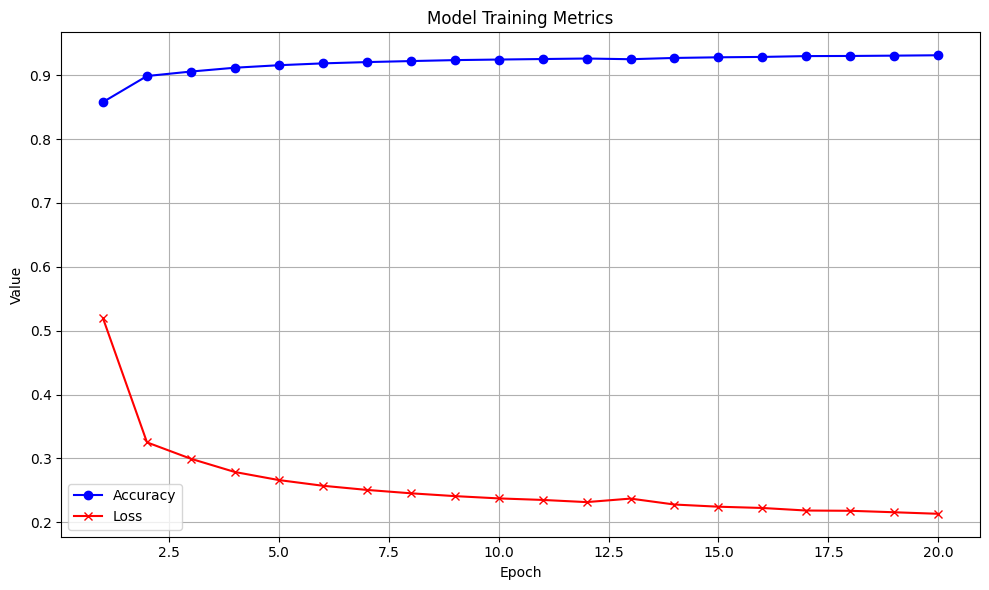

In [14]:
import matplotlib.pyplot as plt

"""
Captured from the experiment (batch size : 128, epochs : 20)
"""

accuracy = [
    0.8579, 
	0.8986, 
	0.9056, 
	0.9116, 
	0.9155, 
	0.9184, 
	0.9204, 
	0.9220, 
	0.9235, 
	0.9244,
    0.9252, 
	0.9260, 
	0.9249, 
	0.9269, 
	0.9279, 
	0.9285, 
	0.9298, 
	0.9300, 
	0.9305, 
	0.9311
]

loss = [
    0.5193, 
	0.3251, 
	0.2994, 
	0.2787, 
	0.2661, 
	0.2572, 
	0.2507, 
	0.2454, 
	0.2410, 
	0.2374,
    0.2350, 
	0.2316, 
	0.2371, 
	0.2278, 
	0.2244, 
	0.2224, 
	0.2184, 
	0.2180, 
	0.2157, 
	0.2133
]

epochs = list(range(1, len(accuracy) + 1))

# <Plotting>
plt.figure(figsize=(10, 6))

# Plot Accuracy
plt.plot(epochs, accuracy, label='Accuracy', color='blue', marker='o')

# Plot Loss
plt.plot(epochs, loss, label='Loss', color='red', marker='x')

plt.title('Model Training Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()